In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
#Fórmula de Algelin para achar a matriz com os coeficientes que da o menor erro
#Theta = (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.39298153]
 [2.6940702 ]]


In [2]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.39298153]
 [9.78112193]]


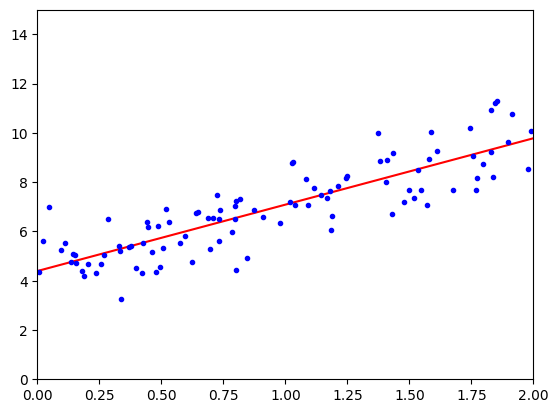

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.39298153] [[2.6940702]]


In [5]:
lin_reg.predict(X_new)

array([[4.39298153],
       [9.78112193]])

In [6]:
#Gradiente Descendente
eta = 0.1 #Taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)

[[4.39298153]
 [2.6940702 ]]


In [7]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[4.38767846]
 [2.68185684]]


In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.44614389] [2.76704225]


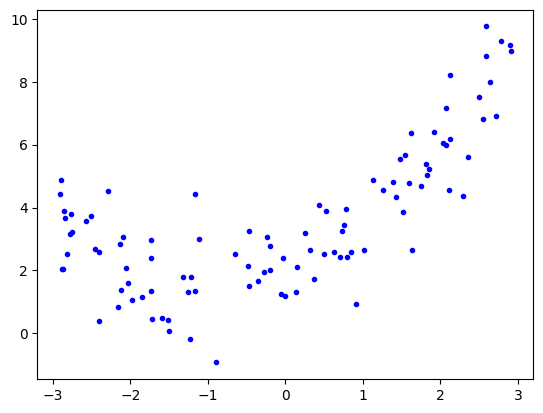

In [9]:
#Regrassão Polinomial

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([2.07543622, 4.30743551])

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02271735]), array([[0.96320733, 0.49063509]]))

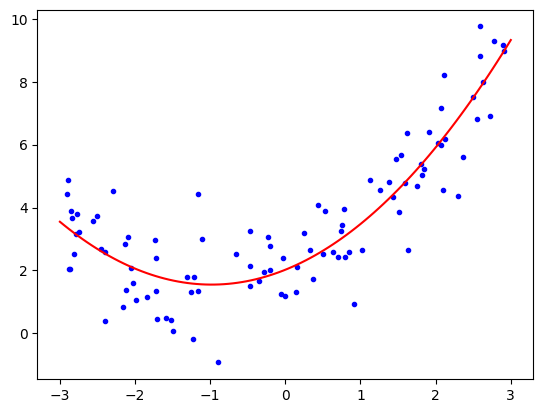

In [12]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) #Cria um array de 100 elementos espaçados entre -3 e 3 e transforma para uma matrix 100x1
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")

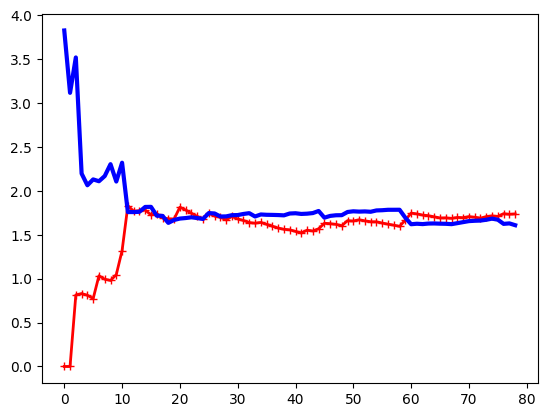

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors = []
    val_errors = []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

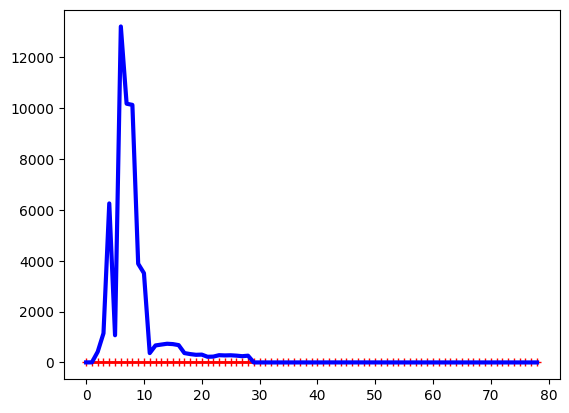

In [16]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

In [18]:
#Ridge Regression

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, solver="cholesky")
ridge.fit(X, y)
ridge.predict([[1.5]])

array([4.88966252])

In [20]:
#Lasso Regression

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso.predict([[1.5]])

array([4.84531142])

In [21]:
#Elastic Net

#Conclusão: Normalmente se deve evitar usar Regressão linear. Ridge é um bom padrão, mas se suspeitar que há apenas 
#algumas variáveis que são úteis, se deve usar o Lasso ou o Elastic (mistura entre os dois que usa um r, sendo r = 0 -> Ridge, r=1 -> Lasso)
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic.fit(X, y)
elastic.predict([[1.5]])

array([4.84969847])

In [ ]:
#Logistic Regression

